In [64]:
#import necessary python libraries
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [65]:
#Load the dataset
vehicle_df = pd.read_csv("https://raw.githubusercontent.com/vanjimohan/aiml/master/vehicle-1-1.csv")


In [66]:
#Check the head of dataset
vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [67]:
#Check for missing values
vehicle_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [68]:
#replace the missing values with NaN
vehicle_df.replace('', np.NaN, inplace=True)

In [69]:
#Filling the missing values with mean since all the columns are numerical
vehicle_df.fillna(vehicle_df.mean(), inplace=True)

In [70]:
#Verifying whether any other null values present on the dataset
vehicle_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [71]:
#Scaling the dataset with zscore to apply box plot to identify the outliers
vehicle_scaled = vehicle_df.drop('class', axis = 1).apply(zscore)

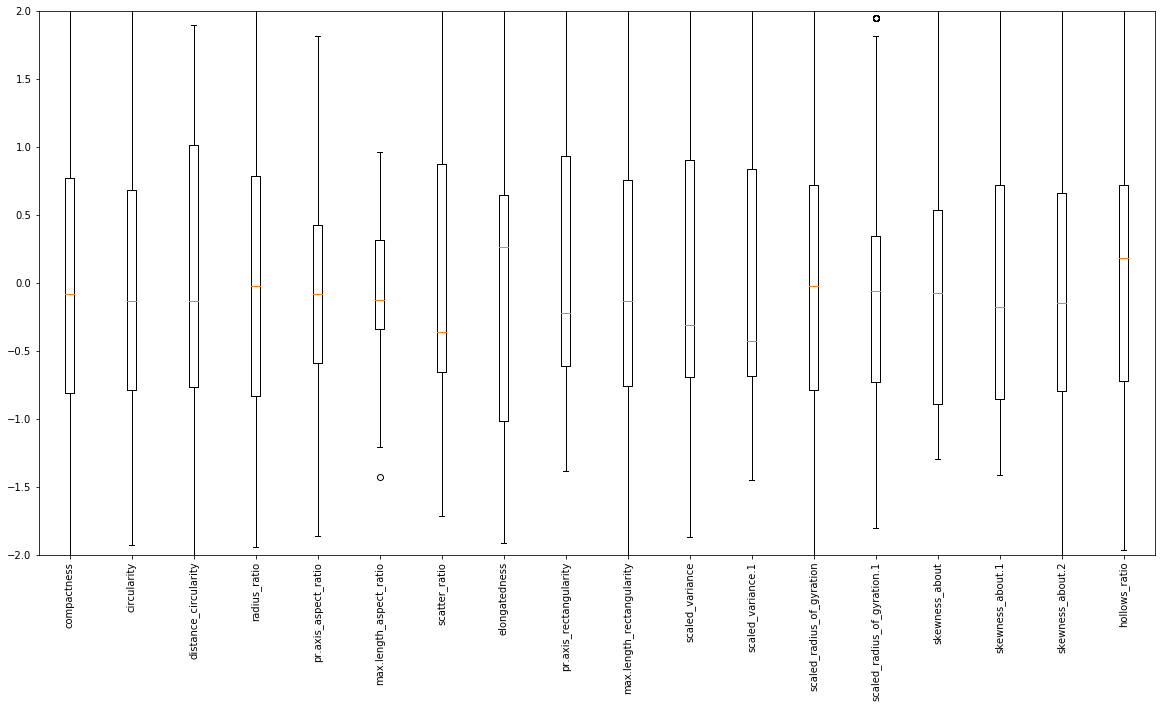

In [72]:
#Ploting boxplot to see the outlier data on each column
cols = vehicle_scaled.columns
position = 1
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.ylim(-2, 2)
for col in cols:
    plt.boxplot(vehicle_scaled[col], positions = [position], labels = [col] )
    position += 1

In [73]:
#Removing Outliers
print("Shape before removing Outliers: ", vehicle_scaled.shape)
vehicle_filtered = vehicle_scaled[(vehicle_scaled < 3).all(axis=1)]
print("Shape after removing Outliers: ", vehicle_filtered.shape)
print((vehicle_scaled.shape[0] - vehicle_filtered.shape[0]) ,"records removed due to outliers")
y = vehicle_df[(vehicle_scaled < 3).all(axis=1)]['class']
print((vehicle_df.shape[0] - y.shape[0]) ,"records removed due to outliers")

Shape before removing Outliers:  (846, 18)
Shape after removing Outliers:  (824, 18)
22 records removed due to outliers
22 records removed due to outliers


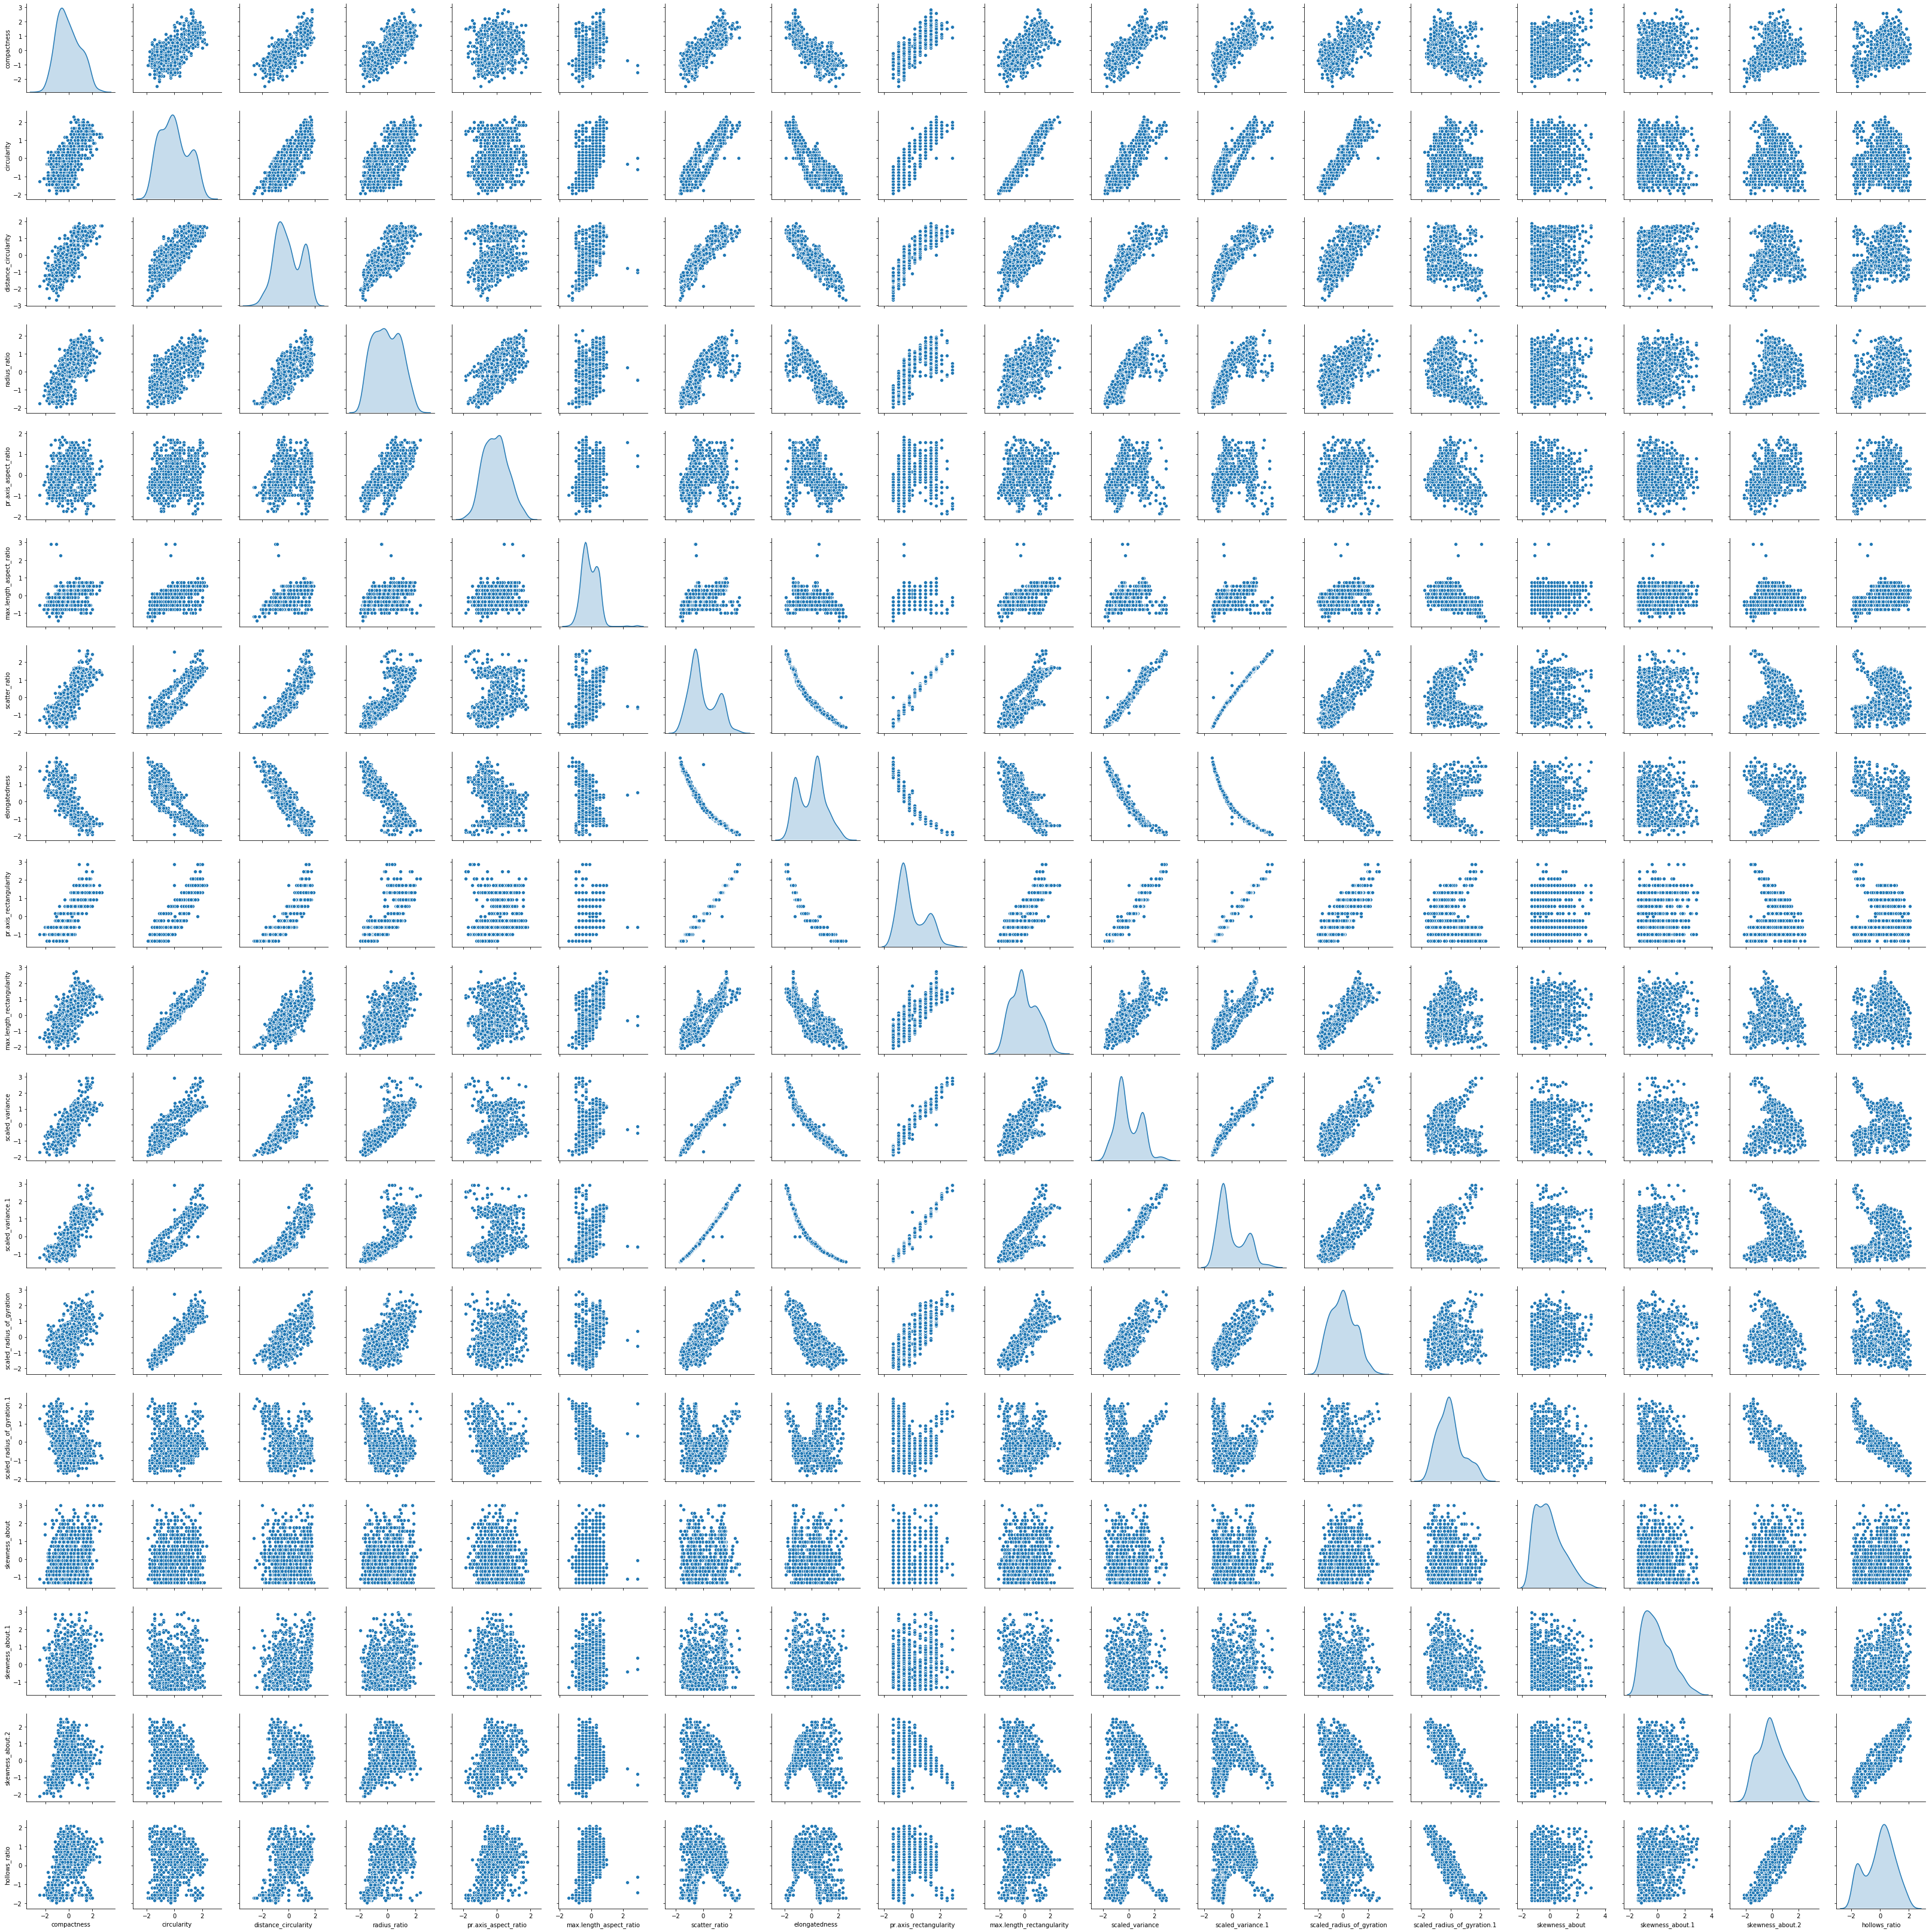

In [35]:
#pair plot with the outliers removed dataset
sns.pairplot(vehicle_filtered,diag_kind='kde')

By seeing the pairplot there are lot of columns having dependency with other columns even though on ideal case all of these should be independent variables. Compactness has positive correlation with Circularity, distance-circularity, radius-ratio, scatter-ratio, pr_axis_rectangularity, max_length_rectangularity, scaled variance1. Like wise there are other variables are more correlated with each other either positive / negatively. Let's check the correlation matrix,

In [74]:
#Reusable method to get the Correlation from the matrix (taken from Stackoverflow)
#https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [75]:
vehicle_df_target_drop = vehicle_df.drop('class', axis = 1)
#Getting top 15 correlation
get_top_abs_correlations(vehicle_df_target_drop, n=15)

scatter_ratio           scaled_variance.1            0.993784
pr.axis_rectangularity  scaled_variance.1            0.989490
scatter_ratio           pr.axis_rectangularity       0.989370
                        elongatedness                0.970723
circularity             max.length_rectangularity    0.961943
elongatedness           scaled_variance.1            0.955074
                        pr.axis_rectangularity       0.949077
scatter_ratio           scaled_variance              0.948296
scaled_variance         scaled_variance.1            0.947021
elongatedness           scaled_variance              0.936715
pr.axis_rectangularity  scaled_variance              0.934568
circularity             scaled_radius_of_gyration    0.926888
distance_circularity    elongatedness                0.911435
                        scatter_ratio                0.904400
                        pr.axis_rectangularity       0.893128
dtype: float64

There are more correlated variables. Exclude the columns which are having correlation >= 0.9
Through this the below columns can be excluded,
scaled_variance.1
pr.axis_rectangularity
elongatedness  
max.length_rectangularity
scaled_radius_of_gyration

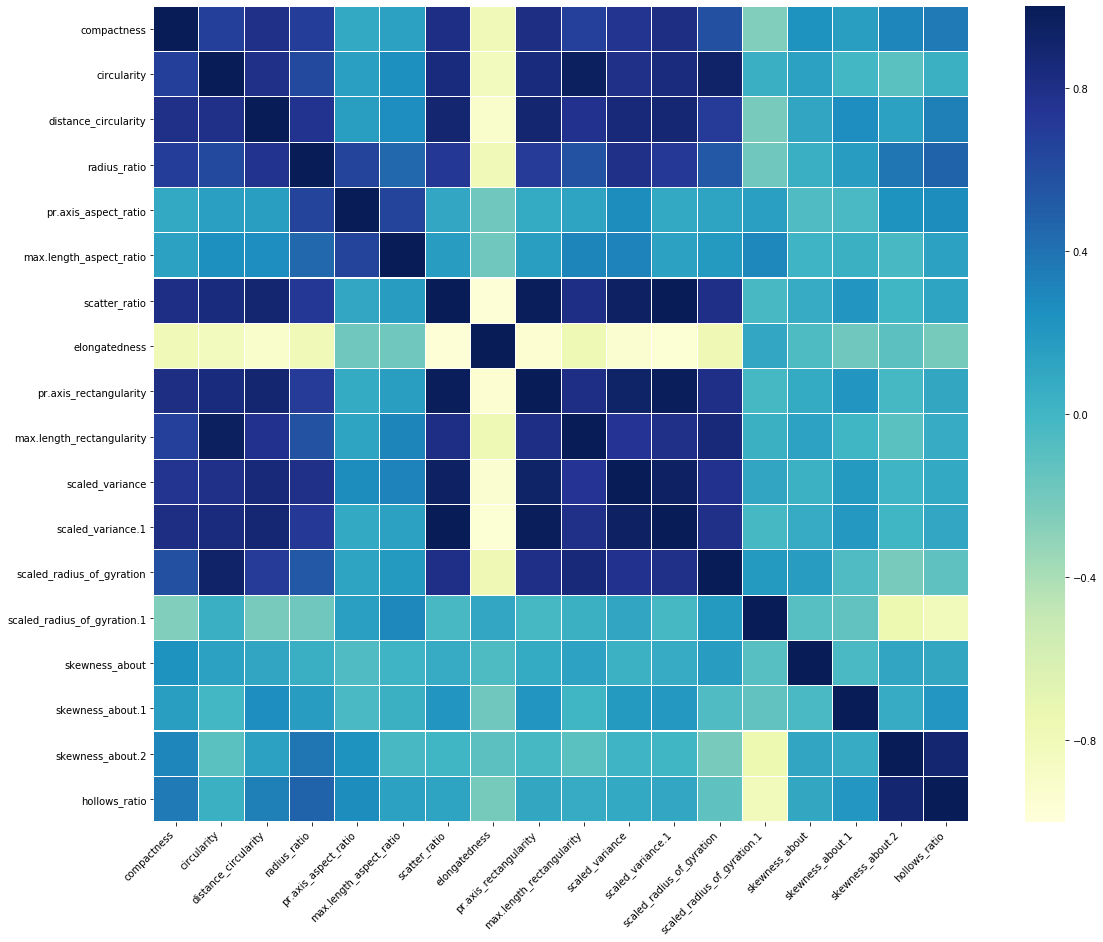

In [78]:
corr = vehicle_df.corr()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,  square=True,cmap ="YlGnBu",linewidths = 0.1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

In [96]:
#excluding columns based on the correlation coefficients
# Now the data is ready to apply the model without performing PCA, vehicle_excluded  can be used.
excludes = ['scaled_variance.1','pr.axis_rectangularity','elongatedness','max.length_rectangularity','scaled_radius_of_gyration']
vehicle_excluded = vehicle_filtered.drop(excludes,axis=1)

In [80]:
#Performing Priciple Component Analysis. 
#Getting Covariance Matrix for the outliers removed data vehicle_filtered.
covMatrix = np.cov(vehicle_filtered,rowvar=False)
covMatrix

array([[ 0.96647252,  0.66645961,  0.77168862,  0.70512626,  0.15249027,
         0.21988743,  0.77777996, -0.76662641,  0.77578489,  0.66003326,
         0.7380162 ,  0.77655623,  0.55426153, -0.24129835,  0.21153589,
         0.1554365 ,  0.31289541,  0.38578097],
       [ 0.66645961,  0.98920931,  0.78464362,  0.61579417,  0.15625033,
         0.25938926,  0.82715005, -0.81083811,  0.82160324,  0.95591229,
         0.76829845,  0.81325814,  0.90808199,  0.02515115,  0.14022398,
        -0.0128448 , -0.09049963,  0.06784471],
       [ 0.77168862,  0.78464362,  0.9941903 ,  0.77488546,  0.18605186,
         0.30195423,  0.8854688 , -0.90188004,  0.87159798,  0.76713301,
         0.84409696,  0.86470954,  0.68699715, -0.23630725,  0.10336495,
         0.26480535,  0.15944872,  0.35224288],
       [ 0.70512626,  0.61579417,  0.77488546,  0.91063858,  0.45827274,
         0.20476535,  0.74673184, -0.80573665,  0.72008555,  0.55717811,
         0.73382912,  0.73256198,  0.5241102 , -0.343

In [81]:
#Performing PCA
pca = PCA(n_components=18)
pca.fit(vehicle_filtered)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [82]:
print("Eigen values: ",np.around(pca.explained_variance_,decimals=4))

Eigen values:  [9.1582e+00 2.9075e+00 1.1534e+00 9.3650e-01 5.2230e-01 4.6240e-01
 2.2440e-01 2.0550e-01 9.9700e-02 6.5300e-02 5.7300e-02 4.2200e-02
 2.8500e-02 2.2300e-02 1.7000e-02 1.5500e-02 9.0000e-03 3.1000e-03]


In [83]:
print(pca.explained_variance_ratio_)

[5.74900057e-01 1.82516607e-01 7.24009777e-02 5.87864926e-02
 3.27895342e-02 2.90278048e-02 1.40873904e-02 1.29021590e-02
 6.25955931e-03 4.09872011e-03 3.59698446e-03 2.65084494e-03
 1.78774463e-03 1.39886765e-03 1.06445846e-03 9.73160749e-04
 5.64306085e-04 1.94330200e-04]


([<matplotlib.axis.XTick at 0x2d6fc450>,
 <a list of 17 Text xticklabel objects>)

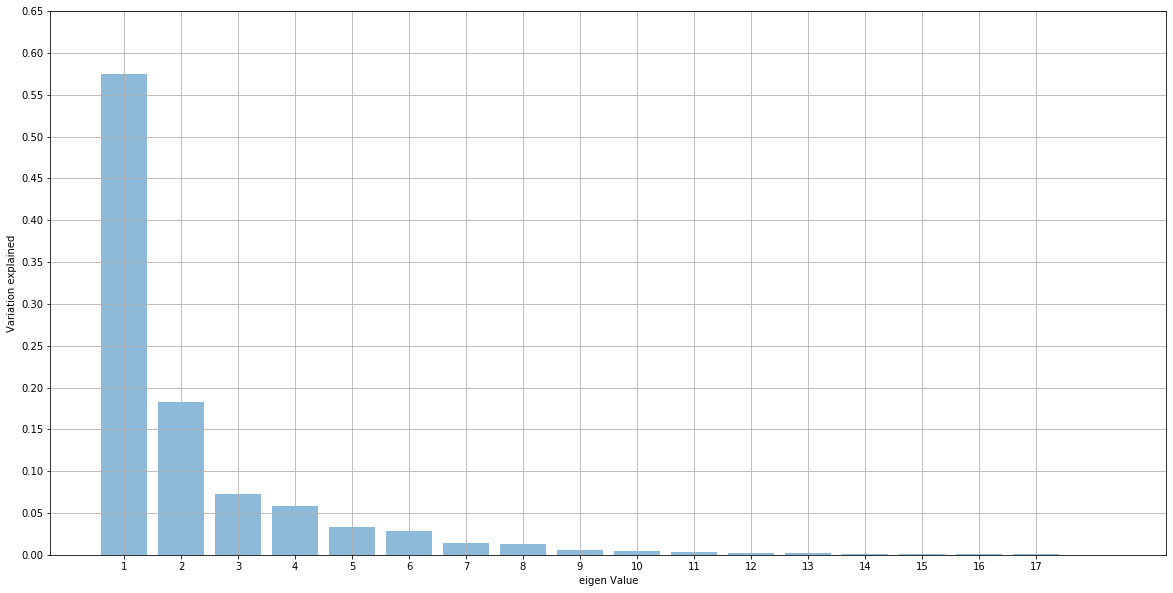

In [84]:
#Ploting the Eigen Values
plt.figure(figsize=(20,10))
plt.grid(axis='both')
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.yticks(np.arange(0, 0.7, 0.05))
plt.xticks(np.arange(1, 18, 1))

Text(0.5, 0, 'eigen Value')

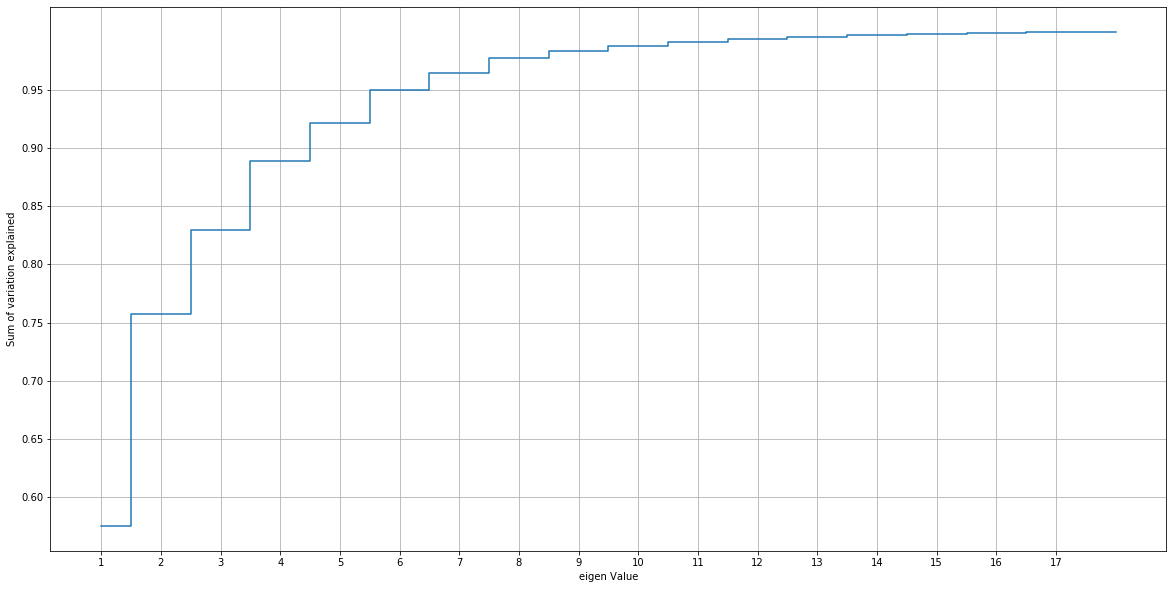

In [85]:
#Ploting the variation vs Eigen Values, adding grid lines to find out how many components required to 
#get more than 95% representation of original data.
plt.figure(figsize=(20,10))
plt.grid(axis='both')
plt.yticks(np.arange(0.5, 1, 0.05))
plt.xticks(np.arange(1, 18, 1))
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Sum of variation explained')
plt.xlabel('eigen Value')

Based on the plot 7 components required to get more than 95% of representation of original data.

In [86]:
pcaReduced = PCA(n_components=7)
pcaReduced.fit(vehicle_filtered)
print(pcaReduced.components_)
print(pcaReduced.explained_variance_ratio_)
XpcaReduced = pcaReduced.transform(vehicle_filtered)

[[ 2.76449338e-01  2.94590886e-01  3.09496026e-01  2.69682237e-01
   7.48701554e-02  8.88300360e-02  3.15724114e-01 -3.17739386e-01
   3.11526333e-01  2.83972263e-01  3.01110919e-01  3.11185121e-01
   2.66763605e-01 -4.64121946e-02  3.93684770e-02  6.04107858e-02
   4.46794016e-02  9.18365722e-02]
 [-1.13671749e-01  1.48256995e-01 -5.53035055e-02 -2.02529952e-01
  -1.72494763e-01 -3.20314731e-02  6.19425812e-02 -3.01249345e-03
   7.37510326e-02  1.38194982e-01  5.40779454e-02  6.42186637e-02
   2.22908857e-01  4.50601852e-01 -3.59790925e-02 -1.19636567e-01
  -5.46970126e-01 -5.35999703e-01]
 [ 6.91817020e-02  1.92154955e-01 -7.66519103e-02 -3.30647868e-02
   5.33622860e-02  2.66213669e-02 -9.95854728e-02  8.34634445e-02
  -9.64020904e-02  1.90196532e-01 -1.20957434e-01 -9.38338813e-02
   2.05602991e-01 -7.30758965e-02  5.74394394e-01 -6.83433880e-01
   1.18455987e-01  5.76459786e-02]
 [ 1.33092447e-01 -6.67685412e-02  6.62364045e-02 -1.61921822e-01
  -3.08775587e-01  2.13972544e-02  1.

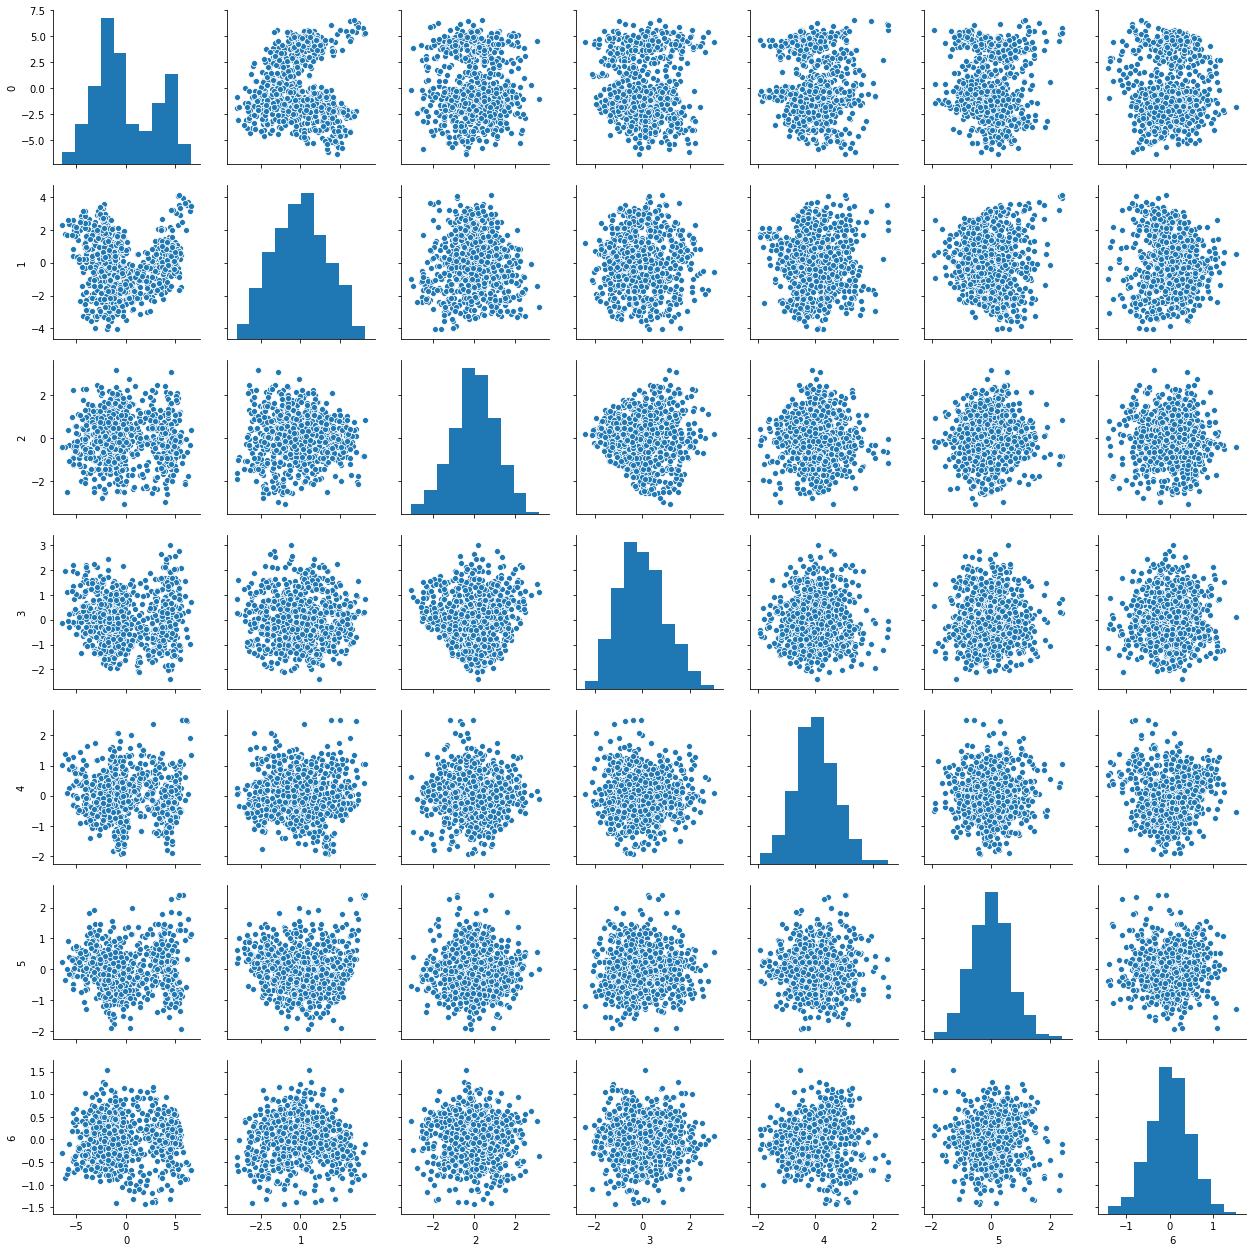

In [87]:
sns.pairplot(pd.DataFrame(XpcaReduced))
#This pairplot shows that there is not relationship between these variables.

In [88]:
#Reusable method to do the SVC model
def doSVCModel(model,X):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)   
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    score = model.score(X_test, y_test)
    print("Score: ", score)

In [97]:
print("Modelling with Original dataset by applying manual exclusions")
doSVCModel(SVC(gamma='auto'), vehicle_excluded)

Modelling with Original dataset by applying manual exclusions
Score:  0.967741935483871


In [90]:
print("Modelling with PCA reduction dataset")
doSVCModel(SVC(gamma='auto'),XpcaReduced)

Modelling with PCA reduction dataset
Score:  0.9354838709677419


By performing the PCA the number of columns were reduced to 7 and hence the accurancy score is reduced 3.22%. However it is with respect to the data available with us. There are chances that the model will perform better in production rather than having original values for training the model.
By reducing the number of columns the storage and computational power also gained.

In [91]:
# Performing grid Search for C, Kernals
def svc_grid_Search(X, y):
    Cs = [0.01, 0.05, 0.5, 1]
    kernels = ['linear','rbf']
    param_grid = {'C': Cs, 'kernel' : kernels}
    grid_search = GridSearchCV(SVC(gamma='auto'), param_grid, cv=5)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [92]:
# getting the best parameters through Grid Search.
result = svc_grid_Search(XpcaReduced,y)
print("Best Parameters: " , result)

Best Parameters:  {'C': 1, 'kernel': 'rbf'}


In [93]:
#Performing SVC model based on best parameters.
doSVCModel(SVC(gamma='auto', C=result['C'], kernel = result['kernel']), XpcaReduced)

Score:  0.9354838709677419


The accuracy score is the same because by default in SVC the C value is 1 and the kernel value is rbf, those are turned out to be the best parameters during GridSearch.